# CPSC 4810 TEAM PROJECT 
### Member: 
- An Nguyen
- Andy Nguyen
- Dawn Dang
- Huan Le Van

# TABLE OF CONTENTS
1. [PROJECT DESCRIPTION](#prob)
2. [BACKGROUND RESEARCH](#research)
3. [THE DATA](#data)
    1. [Supplemental Data](#supdata)
4. [READ IN THE DATA](#reading)
5. [DATA TRANSFORMATION](#trans)
    1. [Mapping company sizes](#map_comp_size)
    2. [Convert datetime format](#date_time)
    3. [Calculate yearly average salary](#cal_salary)
    4. [Clean Location](#clean_localion)
6. [DATA ANALYSIS](#analysis)
    1. [Salary and number of job by experience level and company size](#job_by_exp_com_size)
    2. [Salary and number of job by industry](#job_by_industry)
    3. [Median Salary by job title across some states in the US](#salary_by_states)
    4. [Competitive company breakdown based on salary, experience and number of applicant](#competitive)
    5. [Salary and number of job by states in the US](#salary_no)
    6. [Comparison Remove allowed job and Other in term of salary and job demands](#remote)
    7. [Top skills with highest demand and salary](#skill)
7. [CONCLUSION](#conclusion)

## PROJECT DESCRIPTION<a id='prob'></a>

Our project focuses on analyzing job postings on LinkedIn in the USA last year, using a combination of datasets to ensure we cover all the necessary information. We prioritize data acquisition, preparation, cleaning, and aggregation to create a top-notch dataset for exploratory data analysis (EDA). Through EDA, we aim to discover important insights into the job market, like popular skills, common job titles, where opportunities are located, and trends in different industries. By providing clear insights, our project aims to help decision-making and improve the job market.

## BACKGROUND RESEARCH<a id='research'></a>

Our research centers on analyzing job advertisements on LinkedIn within the United States in 2023. We aim to understand job posting trends, companies' profiles, and job requirements and compensations. Given the complexity of the datasets, we must clean, map, combine, or drop datasets to ensure accuracy.

Key areas of focus include:

- Job Ads Posted on LinkedIn in the US: Examining trends and geographical variations across 50 states.
- Companies Posting Jobs: Analyzing company profiles, including size and industry.
- Job Requirements and Compensation: Investigating diverse skill sets and salary structures.

Our analysis acknowledges variability across states and industries, guiding us to consolidate datasets for effective exploration of correlations and patterns.

## THE DATA<a id='data'></a>

Every day, LinkedIn serves as a go-to platform for thousands of companies and individuals seeking talent or career opportunities. This dataset offers an extensive collection of over 33,000 job postings spanning two distinct days, months apart. Each job listing is rich in detail, encompassing 27 key attributes such as job title, description, salary, location, application URL, and work arrangements (including remote or contract positions). Additionally, supplemental files provide insights into associated benefits, required skills, and relevant industries. Linked to the majority of job postings are corresponding company profiles, detailed in a separate CSV file, featuring company descriptions, headquarters location, employee count, and follower metrics.
Our main datasets:
- companies.csv - Details about hiring companies
- job_postings.csv - Details about the jobs 

Source: [LinkedIn Job Postings - 2023 by ARSH KON](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings)

## SUPPLEMENT DATA<a id='supdata'></a>

Our project also utilise supplemental files from the same source; that offer enriched insights into the job market. These additional datasets provide valuable information on benefits, skills, industries, and company profiles associated with each job posting. By exploring these supplementary datasets, users gain deeper insights into job market dynamics, enabling informed decision-making and strategic planning in talent acquisition and employment.

Supplement datasets:
- **company_industries.csv** : Details on hiring compannies' registered industry names including company IDs.
- **industries.csv** and **jobs_industries.csv**: Lists of industry IDs, matching job IDs, and industry names.
- **company_specialities.csv**: Details on hiring companies special field.
- **employee_counts.csv**: Provide information about hiring companies' number of current employees, its followers and well as the time said data were collected.
- **job_skills.csv** and **skills.csv**: Lists of the key required skills for each job, along with matching job IDs and skill abbreviations.
- **benefit.csv**: contains lists of benefits offered, each matched with corresponding job IDs. 
- **Salaries.csv**: provides information on the compensation range for each job ID, including pay period, currency, and compensation type.

- **abbr-name.json**: external data for list of states, using to get state name from address

The UML diagrams for relationship between objects:

<img align=left src="images/LinkedIn_Jobs.drawio.png" height="600" width="800">

## READING DATA<a id='reading'></a>

In [227]:
#Import library
import pandas as pd
import numpy as np

#### Jobs_postings

In [228]:
#load data
jobs_posting = pd.read_csv('./data/job_postings.csv')
jobs_posting.head(5)    

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,NaN,Entry level,NaN,1.700000e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,NaN,NaN,NaN,1.700000e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.700000e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,NaN,Entry level,NaN,1.700000e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,NaN,Mid-Senior level,NaN,1.700000e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


From the data of jobs posting, we can find some issues that need to fix before doing analysis:
- The salary is in different formats, need to convert into an unique format
- The location is in different formats, need to extract information from those formats
- The date/time columns is in epoch format, need to convert

#### company_detail

In [229]:
df_comp = pd.read_csv('./data/company_details/companies.csv')
df_comp.head(5)

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


From the data of company, we see that the company_size columns is not clear. We need to go back to LinkedIn to find the proper mapping to transform this column

## DATA TRANSFORMATION<a id='trans'></a>

### Mapping company sizes<a id='map_comp_size'></a>
We generate a mapping file to correlate company size levels (1-7) with real company sizes on LinkedIn, aiming to explore how company size influences offered skills and salaries in job postings.

In [230]:
comp_level = {
    'Level': [7, 6, 5, 4, 3, 2, 1],
    'Company size': ['10,001 +', '5001-10,000', '1001-5000', '501-1000', '201-500', '51-200', 'Under 50']
}

df_comp_level = pd.DataFrame(comp_level)
df_comp_level

,Level,Company size
0,7,"10,001 +"
1,6,"5001-10,000"
2,5,1001-5000
3,4,501-1000
4,3,201-500
5,2,51-200
6,1,Under 50


In [231]:
df_comp_merged = pd.merge(df_comp_level, df_comp, left_on='Level', right_on='company_size', how='inner')
df_comp_merged.head(5)

,Level,Company size,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,7,"10,001 +",1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,7,"10,001 +",1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,7,"10,001 +",1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,7,"10,001 +",1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,7,"10,001 +",1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


### Convert number to datetime format<a id='date_time'></a>
Data store the date and time the posting was posted, expired but in epoch format so we need to convert to readable date time format

In [232]:
jobs_posting['new_original_listed_time'] = pd.to_datetime(jobs_posting['original_listed_time'], unit='ms')
jobs_posting['new_closed_time'] = pd.to_datetime(jobs_posting['closed_time'], unit='ms')
jobs_posting['new_listed_time'] = pd.to_datetime(jobs_posting['listed_time'], unit='ms')

In [233]:
jobs_posting[['closed_time','listed_time','new_original_listed_time','new_closed_time','new_listed_time']]

,closed_time,listed_time,new_original_listed_time,new_closed_time,new_listed_time
0,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
1,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
2,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
3,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
4,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
...,...,...,...,...,...
33241,NaN,1.690000e+12,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40
33242,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
33243,NaN,1.700000e+12,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20
33244,NaN,1.690000e+12,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40


### Calculate yearly average salary<a id='cal_salary'></a>


The salary data in the raw file is in different format (Yearly, Monthly, Hourly, Weekly ...)

In [234]:
jobs_posting['pay_period'].unique()

array(['MONTHLY', nan, 'HOURLY', 'YEARLY', 'WEEKLY', 'ONCE'], dtype=object)

We have to transform the salary to a single format (__Yearly__) to do the related analysis

avarage = medium salary or = (max + min) /2

In [235]:
# Fill NaN values in 'med_salary' with the average of 'max_salary' and 'min_salary'
jobs_posting['avg_salary'] = jobs_posting['med_salary'].fillna((jobs_posting['max_salary'] + jobs_posting['min_salary']) / 2)

# Change all salary to yearly salary unit
jobs_posting['yearly_avg_salary'] = jobs_posting['avg_salary']
multiplier_map = {'YEARLY': 1,
                  'HOURLY': 40 * 52.2,
                  'MONTHLY': 12,
                  'WEEKLY': 52.2,
                  'ONCE': 1}
jobs_posting['yearly_avg_salary'] *= jobs_posting['pay_period'].map(multiplier_map)
jobs_posting.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,sponsored,work_type,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,0,FULL_TIME,USD,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,0,FULL_TIME,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,0,FULL_TIME,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,0,FULL_TIME,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,0,FULL_TIME,USD,BASE_SALARY,1699085346,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,240895.00,240895.00


For the jobs with NA salary, we are going to fill with the mean values of similar job (industry, same work_type, experience_level)

In [236]:
jobs_posting[jobs_posting['yearly_avg_salary'].isnull()]

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,sponsored,work_type,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,0,FULL_TIME,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,0,FULL_TIME,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
5,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,United States,NaN,...,0,FULL_TIME,NaN,NaN,1699137801,2023-11-14 22:13:20,2023-11-14 22:13:20,2023-11-14 22:13:20,NaN,NaN
6,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",NaN,...,0,FULL_TIME,NaN,NaN,1699089473,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
7,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",NaN,NaN,NaN,NaN,Full-time,"Sussex, NJ",NaN,...,0,FULL_TIME,NaN,NaN,1699138852,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,218881389,NaN,Accounting Associate,NaN,NaN,NaN,NaN,Full-time,"Bolingbrook, IL",1.0,...,0,FULL_TIME,NaN,NaN,1699084455,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN
33240,133196985,1089558.0,Model Risk Auditor,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,...,0,CONTRACT,NaN,NaN,1,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40,NaN,NaN
33241,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,...,0,FULL_TIME,NaN,NaN,1,2023-07-22 04:26:40,NaT,2023-07-22 04:26:40,NaN,NaN
33242,108965123,NaN,Office Administrative Assistant,NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,...,0,FULL_TIME,NaN,NaN,1699044401,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN


In [237]:
job_industries = pd.read_csv('./data/job_details/job_industries.csv')
industries = pd.read_csv('./data/maps/industries.csv')

Check duplicate industries table before merge:

In [238]:
count_industry = job_industries.groupby('job_id').size().reset_index(name = 'count').sort_values(by = 'count', ascending= False)
count_industry

,job_id,count
18715,3749375235,3
10203,3699056458,3
25457,3757437745,3
25453,3757437713,3
25451,3757437655,3
...,...,...
12690,3700545914,1
12689,3700545895,1
12688,3700545891,1
12686,3700545792,1


In [239]:
job_industries_unique = job_industries.drop_duplicates(subset=['job_id'], keep='first')
job_industries_unique

,job_id,industry_id
0,3378133231,68
1,3497509795,96
2,3690843087,47
3,3691775263,112
4,3691779379,80
...,...,...
44082,3757720281,124
44085,3757486249,11
44088,3757780487,104
44089,3757934256,80


In [240]:
job_industries_unique.groupby('job_id').size().reset_index(name = 'count').sort_values(by = 'count', ascending= False)

,job_id,count
0,3958427,1
22039,3755594126,1
22069,3755594305,1
22068,3755594303,1
22067,3755594301,1
...,...,...
11024,3699083324,1
11023,3699083316,1
11022,3699083312,1
11021,3699083310,1


Since there are duplicate exists, we decided just keep the unique value to merge:

In [241]:
jobs_posting_2 = pd.merge(jobs_posting,job_industries_unique, on = 'job_id', how = 'left')
jobs_posting_2 = pd.merge(jobs_posting_2, industries, on = 'industry_id', how = 'left')
jobs_posting_2.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,currency,compensation_type,scraped,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,industry_id,industry_name
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,USD,BASE_SALARY,1699138101,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.00,17.0,Medical Equipment Manufacturing
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,...,NaN,NaN,1699085420,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,135.0,Industrial Machinery Manufacturing
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,...,NaN,NaN,1699085644,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,NaN,147.0,Automation Machinery Manufacturing
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,USD,BASE_SALARY,1699087461,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.76,100.0,Non-profit Organizations
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,USD,BASE_SALARY,1699085346,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,240895.00,240895.00,27.0,Retail


In [242]:
#fill NA
jobs_posting_2['yearly_avg_salary'] = jobs_posting_2.groupby(['formatted_work_type', 'formatted_experience_level','industry_name'])['yearly_avg_salary'].transform(lambda x: x.fillna(x.mean()))



In [243]:
jobs_posting_2['yearly_avg_salary'].isnull().sum().sum()

9963

There are still missing values in the yearly_avg_salary column because those jobs had all max/med/min_salary column as NaN and no similar industry, work_type, experience_level

In [244]:
# Drop rows that have missing values on all 4 columns of salary
jobs_posting_2 = jobs_posting_2.dropna(subset=['max_salary',"med_salary",'min_salary','yearly_avg_salary'], how='all')

In [245]:
jobs_posting_2['yearly_avg_salary'].isnull().sum().sum()

3568

In [246]:
# Fill NA values by avg yearly salary of the whole column
jobs_posting_2['yearly_avg_salary'].fillna(jobs_posting_2['yearly_avg_salary'].mean(), inplace=True)

In [247]:
jobs_posting_2['yearly_avg_salary'].isna().sum().sum()

0

In [248]:
# Drop all NA values from column
jobs_posting = jobs_posting_2[jobs_posting_2['yearly_avg_salary'].notnull()]
jobs_posting['yearly_avg_salary'].isna().sum().sum()

0

In [249]:
jobs_posting.groupby('job_id').size().reset_index(name = 'count').sort_values(by = 'count', ascending= False).head(5)

,job_id,count
0,3958427,1
17935,3756104936,1
17907,3756104287,1
17906,3756104248,1
17905,3756104247,1


#### Clean Location <a id='clean_localion'></a>

The Location column in the dataset include 4 format of infomation:
- Country (United States)
- City + Shortname of state (Ex: New York, NY ..)
- City + State + Country (Ex: St Clair Shores, Michigan, United States ..)
- Metropolitan Area (Ex: New York City Metropolitan Area ..)

In the scope of this analysis, we just deal with the 2nd & 3rd types, which is to process the state infomation



In [250]:
jobs_posting.groupby('location').size().reset_index(name = 'counts').sort_values(by = 'counts', ascending=False).head(15)

,location,counts
3768,United States,1610
2612,"New York, NY",720
652,"Chicago, IL",417
1704,"Houston, TX",352
154,"Atlanta, GA",324
861,"Dallas, TX",312
2131,"Los Angeles, CA",308
378,"Boston, MA",274
178,"Austin, TX",263
3267,"San Francisco, CA",247


External dataset __abbr-name.json__ includes infomation of shortname mapping to name of state

In [251]:
df_states = pd.read_json('./data/abbr-name.json', orient='index')
df_states.reset_index(inplace=True)
df_states.columns = ['state_short_name', 'state']
df_states.head(5)

,state_short_name,state
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


Filter list of locations (City, State) from the job_posting dataset:

In [252]:
df_location  = pd.DataFrame(jobs_posting[(jobs_posting['location'].str.contains(','))]['location'].unique())
df_location.columns  = ['Location']
df_location.head(5)

,Location
0,"Little River, SC"
1,"Aliso Viejo, CA"
2,"Daytona Beach, FL"
3,"Sussex, NJ"
4,"Texas, United States"


In [253]:
df_location[['city','state','country']] = df_location['Location'].str.split(', ', expand=True)
df_location

,Location,city,state,country
0,"Little River, SC",Little River,SC,None
1,"Aliso Viejo, CA",Aliso Viejo,CA,None
2,"Daytona Beach, FL",Daytona Beach,FL,None
3,"Sussex, NJ",Sussex,NJ,None
4,"Texas, United States",Texas,United States,None
...,...,...,...,...
4017,"Clarksville, IN",Clarksville,IN,None
4018,"Middleton, MA",Middleton,MA,None
4019,"Madison, GA",Madison,GA,None
4020,"Thomson, GA",Thomson,GA,None


Now we join with state list (__abbr-name.json__) to get statename

In [254]:
df_location_merge = pd.merge(df_location, df_states, left_on='state', right_on='state_short_name', how='left')
df_location_merge

,Location,city,state_x,country,state_short_name,state_y
0,"Little River, SC",Little River,SC,None,SC,South Carolina
1,"Aliso Viejo, CA",Aliso Viejo,CA,None,CA,California
2,"Daytona Beach, FL",Daytona Beach,FL,None,FL,Florida
3,"Sussex, NJ",Sussex,NJ,None,NJ,New Jersey
4,"Texas, United States",Texas,United States,None,NaN,NaN
...,...,...,...,...,...,...
4017,"Clarksville, IN",Clarksville,IN,None,IN,Indiana
4018,"Middleton, MA",Middleton,MA,None,MA,Massachusetts
4019,"Madison, GA",Madison,GA,None,GA,Georgia
4020,"Thomson, GA",Thomson,GA,None,GA,Georgia


However, when filtering the location with column country is not null, we can see that the state_x column is already in full state name. So we just update the state_y colums = state_x columns for these rows

In [255]:
df_location_merge[df_location_merge['country'].notnull()].head(5)

,Location,city,state_x,country,state_short_name,state_y
5,"St Clair Shores, Michigan, United States",St Clair Shores,Michigan,United States,NaN,NaN
155,"Wilmington, Delaware, United States",Wilmington,Delaware,United States,NaN,NaN
217,"Denver, Colorado, United States",Denver,Colorado,United States,NaN,NaN
245,"Fremont, California, United States",Fremont,California,United States,NaN,NaN
461,"Los Angeles, California, United States",Los Angeles,California,United States,NaN,NaN


In [256]:
df_location_merge.loc[df_location_merge['country'].notnull(), 'state_y'] = df_location_merge['state_x']

In [257]:
df_location_merge[df_location_merge['country'].notnull()].head(5)

,Location,city,state_x,country,state_short_name,state_y
5,"St Clair Shores, Michigan, United States",St Clair Shores,Michigan,United States,NaN,Michigan
155,"Wilmington, Delaware, United States",Wilmington,Delaware,United States,NaN,Delaware
217,"Denver, Colorado, United States",Denver,Colorado,United States,NaN,Colorado
245,"Fremont, California, United States",Fremont,California,United States,NaN,California
461,"Los Angeles, California, United States",Los Angeles,California,United States,NaN,California


In [258]:
# Drop redundant columns
df_location_merge.drop(columns=['state_x','country','state_short_name'], inplace=True)

# Rename the columns for clarity
df_location_merge.rename(columns={'state_y': 'state'}, inplace=True)

In [259]:
#drop NA:
df_location_merge.dropna(subset = ['state'])

,Location,city,state
0,"Little River, SC",Little River,South Carolina
1,"Aliso Viejo, CA",Aliso Viejo,California
2,"Daytona Beach, FL",Daytona Beach,Florida
3,"Sussex, NJ",Sussex,New Jersey
5,"St Clair Shores, Michigan, United States",St Clair Shores,Michigan
...,...,...,...
4017,"Clarksville, IN",Clarksville,Indiana
4018,"Middleton, MA",Middleton,Massachusetts
4019,"Madison, GA",Madison,Georgia
4020,"Thomson, GA",Thomson,Georgia


Now we finally join with the original dataset to get the state:


In [260]:
jobs_posting = pd.merge(jobs_posting, df_location_merge, left_on='location', right_on='Location', how='left')
#jobs_posting_lcn.dropna(subset = ['state'])
jobs_posting.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,new_original_listed_time,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,industry_id,industry_name,Location,city,state
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,5250.00,63000.000000,17.0,Medical Equipment Manufacturing,"Little River, SC",Little River,South Carolina
1,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,22.27,46499.760000,100.0,Non-profit Organizations,"Aliso Viejo, CA",Aliso Viejo,California
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,240895.00,240895.000000,27.0,Retail,NaN,NaN,NaN
3,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,United States,NaN,...,2023-11-14 22:13:20,2023-11-14 22:13:20,2023-11-14 22:13:20,NaN,120439.673333,17.0,Medical Equipment Manufacturing,NaN,NaN,NaN
4,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",NaN,...,2023-11-14 22:13:20,NaT,2023-11-14 22:13:20,NaN,76233.333333,3198.0,Automotive,"Daytona Beach, FL",Daytona Beach,Florida


## DATA ANALYSIS<a id='analysis'></a>

## 1. The mean salary and number of each job by experience level and company size<a id='job_by_exp_com_size'></a>

### The number of each job by experience level and company size

For this analysis, we'll divide it into two separate parts. 

The first part entails examining the number of jobs based on experience level and company size. To achieve this, we need to create a new column named *industry* by mapping the *company_id* from **df_comp_merged** and **jobs_posting_com**

In [261]:
jobs_posting_comp = pd.merge(jobs_posting, df_comp_merged[['company_id', 'Company size']], on='company_id', how='left')

jobs_posting_comp.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,industry_id,industry_name,Location,city,state,Company size
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,...,NaT,2023-11-14 22:13:20,5250.00,63000.000000,17.0,Medical Equipment Manufacturing,"Little River, SC",Little River,South Carolina,1001-5000
1,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,NaT,2023-11-14 22:13:20,22.27,46499.760000,100.0,Non-profit Organizations,"Aliso Viejo, CA",Aliso Viejo,California,501-1000
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,...,NaT,2023-11-14 22:13:20,240895.00,240895.000000,27.0,Retail,NaN,NaN,NaN,1001-5000
3,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,United States,NaN,...,2023-11-14 22:13:20,2023-11-14 22:13:20,NaN,120439.673333,17.0,Medical Equipment Manufacturing,NaN,NaN,NaN,1001-5000
4,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",NaN,...,NaT,2023-11-14 22:13:20,NaN,76233.333333,3198.0,Automotive,"Daytona Beach, FL",Daytona Beach,Florida,"5001-10,000"


Calculate the number of jobs by  by experience level and company size and then visualize the results.

In [262]:
jobs_count = jobs_posting_comp.groupby(['formatted_experience_level', 'Company size']).size()
jobs_count


formatted_experience_level  Company size
Associate                   10,001 +         548
                            1001-5000        610
                            201-500          349
                            5001-10,000      182
                            501-1000         234
                            51-200           392
                            Under 50         209
Director                    10,001 +         310
                            1001-5000        220
                            201-500          301
                            5001-10,000       99
                            501-1000         103
                            51-200           147
                            Under 50          65
Entry level                 10,001 +        3129
                            1001-5000       1647
                            201-500          454
                            5001-10,000     1110
                            501-1000         655
                            

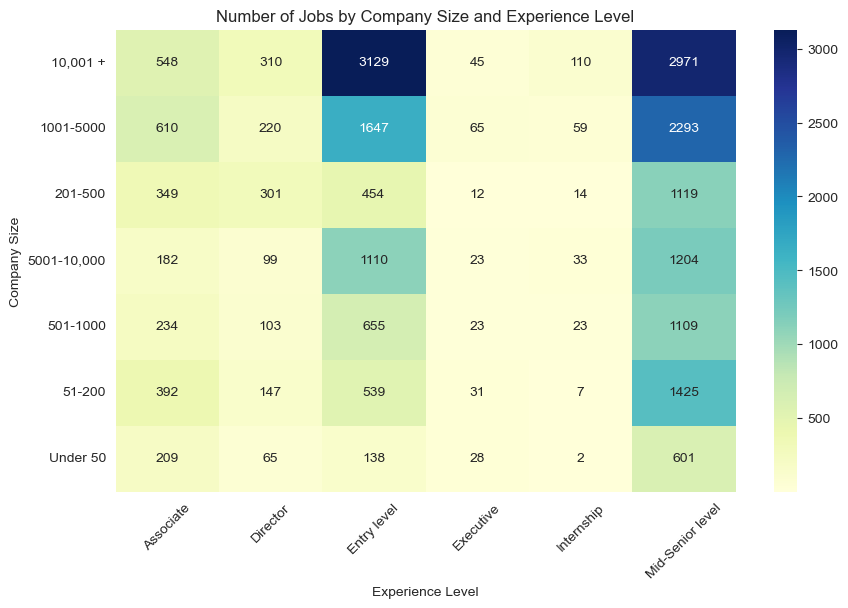

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to have 'Company size' and 'formatted_experience_level' as columns
jobs_count1 = jobs_count.reset_index()

# Pivot the DataFrame to have 'Company size' as rows, 'formatted_experience_level' as columns, and values as job counts
pivot_table = jobs_count1.pivot(index='Company size', columns='formatted_experience_level', values=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Number of Jobs by Company Size and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.xticks(rotation=45)
plt.show()

## Mean salary by experience level and company size

Calculate the mean salary of each jobs by experience level and company size and then visualize the results.

In [264]:
# Group the data by 'Company size' and 'formatted_experience_level', and calculate the mean of 'yearly_avg_salary' for each group


from scipy import stats

# Group by 'Company size' and 'formatted_experience_level'
grouped = jobs_posting_comp.groupby(['Company size', 'formatted_experience_level'])

# Calculate mean and std dev of 'yearly_avg_salary' within each group
mean_std = grouped['yearly_avg_salary'].agg(['mean', 'std']).reset_index()

# Merge the mean and std dev back to the original dataframe to use in Z-score calculation
df_merged = pd.merge(jobs_posting_comp,mean_std, on=['Company size', 'formatted_experience_level'], how = 'left')

# Calculate Z-score
df_merged['zscore'] = (df_merged['yearly_avg_salary'] - df_merged['mean']) / df_merged['std']

# Show the resulting dataframe with Z-scores
df_merged[['Company size', 'formatted_experience_level', 'yearly_avg_salary', 'zscore']]



,Company size,formatted_experience_level,yearly_avg_salary,zscore
0,1001-5000,Entry level,63000.000000,-0.043631
1,501-1000,Entry level,46499.760000,-0.099460
2,1001-5000,Mid-Senior level,240895.000000,0.844965
3,1001-5000,Mid-Senior level,120439.673333,0.036390
4,"5001-10,000",Entry level,76233.333333,-0.015878
...,...,...,...,...
26846,NaN,NaN,140882.914456,NaN
26847,51-200,NaN,140882.914456,NaN
26848,51-200,NaN,140882.914456,NaN
26849,NaN,NaN,140882.914456,NaN


Filter outliers:

In [265]:
df_merged = df_merged[(df_merged['zscore']>= -3)&(df_merged['zscore']<=3)]

final_mean_salary = df_merged.groupby(['Company size', 'formatted_experience_level', 'title'])['yearly_avg_salary'].mean().reset_index()

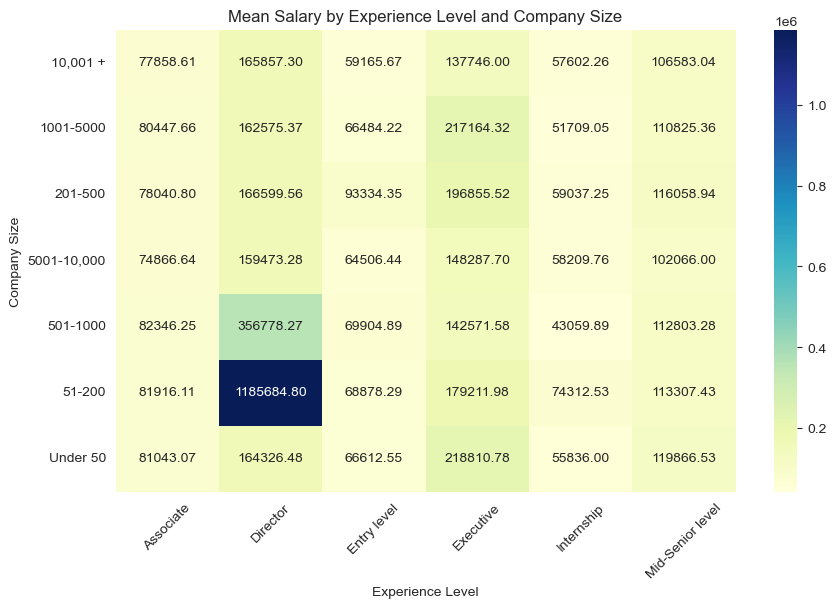

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the table
pivot_table = final_mean_salary.pivot_table(index='Company size', columns='formatted_experience_level', values='yearly_avg_salary', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Mean Salary by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.xticks(rotation=45)
plt.show()

## 2. Salary and number of job by industry<a id='job_by_industry'></a>

Read the **company_industries.csv** dataset and create a new column name *industry* my mapping the *company_id*

In [267]:
comp_industries = pd.read_csv("./data/company_details/company_industries.csv")


In [268]:
#check duplicate before merge:
comp_industries_dup = comp_industries.groupby('company_id').size().reset_index(name = 'count').sort_values(by = 'count', ascending= False)
comp_industries_dup[comp_industries_dup['count']>1]

,company_id,count
0,1009,2
1253,15473,2
10276,76500049,2
10277,76507853,2
2647,79560,2
...,...,...
688,6963,2
5643,2073870,2
6469,3210501,2
793,8117,2


After check value, we found than the data redundant in some value

In [269]:
comp_industries[comp_industries['company_id']==1009] 

,company_id,industry
3674,1009,Information Technology & Services
6010,1009,IT Services and IT Consulting


That's why we drop the dupllicate values:

In [270]:
#Drop duplicate values in company industries:
comp_industries_unique = comp_industries.drop_duplicates(subset=['company_id'], keep='first')

In [271]:
jobs_posting_comp = pd.merge(jobs_posting_comp, comp_industries_unique[['company_id', 'industry']], on='company_id', how='left')

Drop any row with missing value. Then, rename and remove any duplicates 


In [272]:
# Drop NaN
jobs_posting_comp = jobs_posting_comp.dropna(subset=['industry'])
# Rename duplicates

jobs_posting_comp['industry'] = jobs_posting_comp['industry'].replace({
    'Information Technology & Services': 'IT Services and IT Consulting',
    'Professional Training and Coaching': 'Professional Training & Coaching',
    'Staffing and Recruiting': 'Staffing & Recruiting',
    'Book and Periodical Publishing': 'Publishing',
    'Hospitals and Health Care': 'Hospital & Health Care'
})

Calculate salary and number of job by industry. Visualize the results.

In [273]:
industry_stats = jobs_posting_comp.groupby('industry').agg({'yearly_avg_salary': 'mean', 'job_id': 'count'})
industry_stats = industry_stats.rename(columns={'yearly_avg_salary': 'Mean Salary', 'job_id': 'Number of Jobs'})
industry_stats

,Mean Salary,Number of Jobs
industry,,
Accounting,110261.453739,170
Administration of Justice,63523.000000,2
Advertising Services,116795.783117,147
Airlines and Aviation,87409.622744,41
Airlines/Aviation,113362.845232,16
...,...,...
Wholesale Import and Export,140882.914456,1
Wine & Spirits,96221.341856,9
Wireless,92500.000000,1


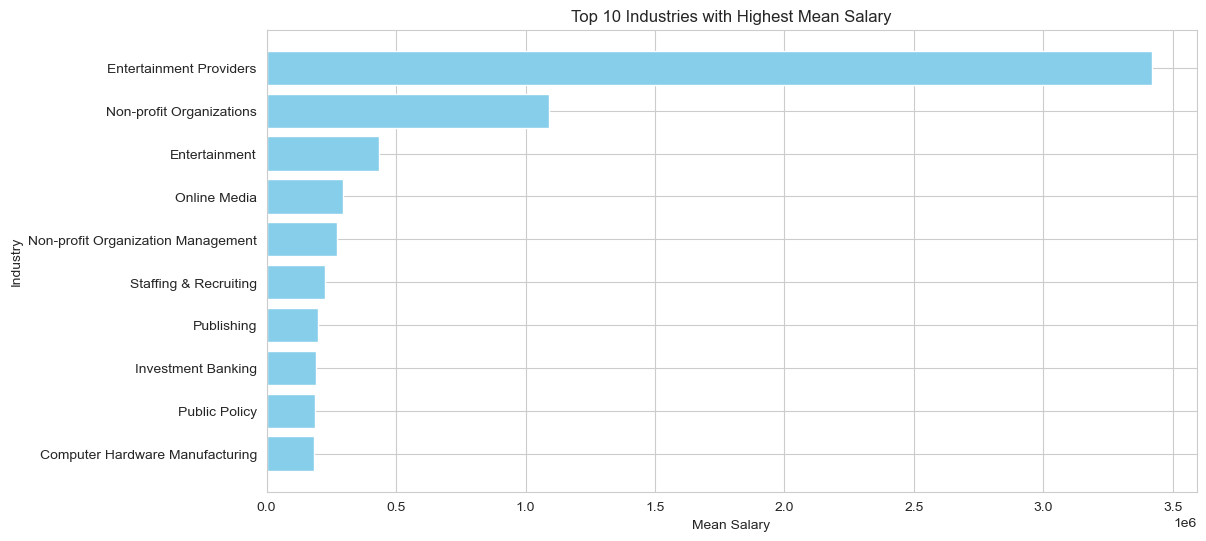

In [274]:
industry_stats_sorted = industry_stats.sort_values(by='Mean Salary', ascending=False) # sort mean
top_10_industries = industry_stats_sorted.head(10) # Select the top 10 industries with the highest mean salary

plt.figure(figsize=(12, 6))
plt.barh(top_10_industries.index, top_10_industries['Mean Salary'], color='skyblue')
plt.xlabel('Mean Salary')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest Mean Salary')
plt.gca().invert_yaxis()  # Invert y-axis to display highest salary at the top
plt.show()

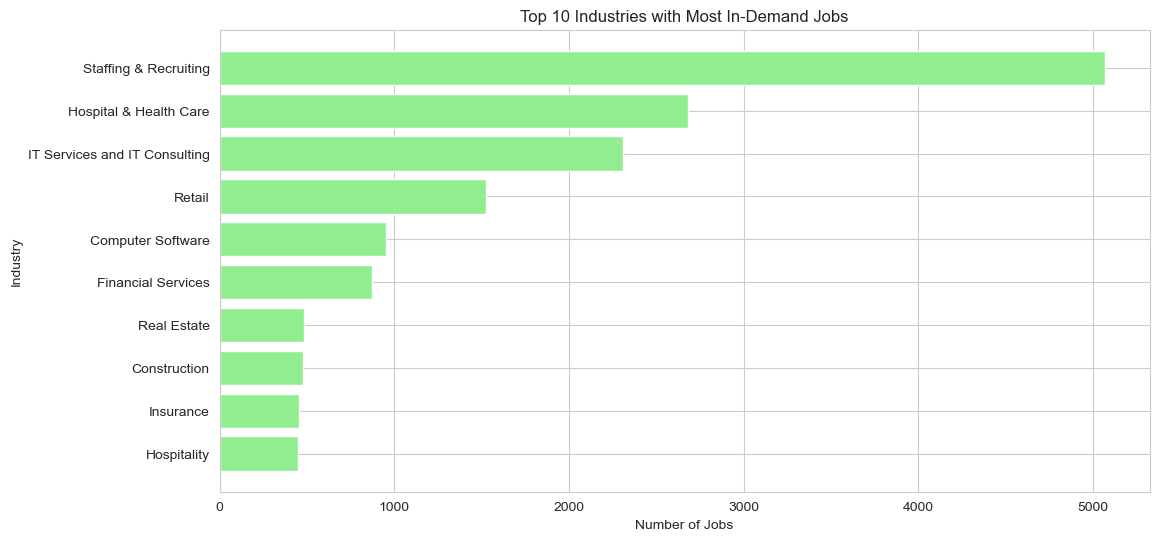

In [275]:
industry_stats_sorted = industry_stats.sort_values(by='Number of Jobs', ascending=False)

# Select the top 10 industries with the highest number of jobs
top_10_jobs = industry_stats_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_jobs.index, top_10_jobs['Number of Jobs'], color='lightgreen')
plt.xlabel('Number of Jobs')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Most In-Demand Jobs')
plt.gca().invert_yaxis()  # Invert y-axis to display highest demand at the top
plt.show()

## 3.Median Salary by job title across some states in the US<a id='salary_by_states'></a>

### Cleaning data

Copy new dataframe and drop NA or missing value first.

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
jobs_posting_sal_state = jobs_posting.copy().dropna(subset=['state', 'yearly_avg_salary'], how='any')

# Calculate the median salary by job title and by state
med_sal_ts = jobs_posting_sal_state.groupby(['title', 'state'])['yearly_avg_salary'].median().reset_index()
med_sal_ts

,title,state,yearly_avg_salary
0,"Research Associate II, Pathobiology",California,80388.000000
1,React JS + Java Full stack Developer,Arizona,118352.582478
2,Account Manager,Illinois,100346.610704
3,Account Manager,Nebraska,43848.000000
4,Accounting Associate (2196),Louisiana,67546.086957
...,...,...,...
20226,salesperson,Ohio,35172.216986
20227,surgery aide,Florida,173826.782778
20228,"tech 1, Installation",Connecticut,140882.914456
20229,warehouse associate I- 1B,Illinois,78503.117500


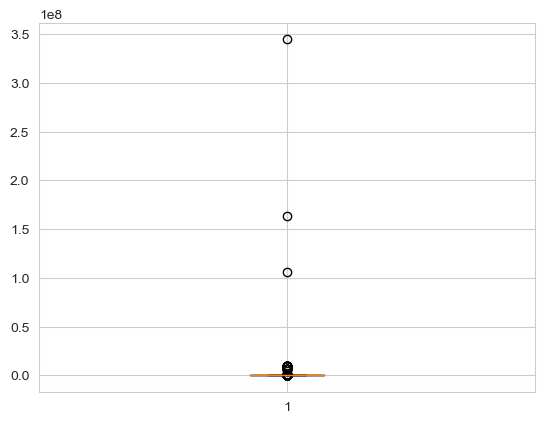

In [277]:
plt.boxplot(med_sal_ts['yearly_avg_salary'])
plt.show()

There are some outliners that we can observe above so we will identify those outliners and remove it before analysis

<function matplotlib.pyplot.show(close=None, block=None)>

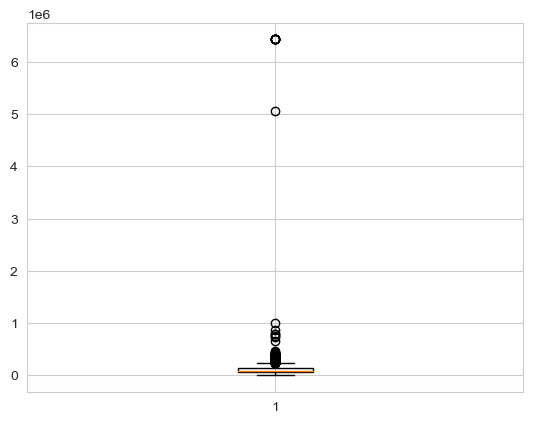

In [278]:
from scipy import stats
data_z_score_sal = stats.zscore(med_sal_ts['yearly_avg_salary'])
med_sal_ts['z_score']=data_z_score_sal
med_sal_ts_filter = med_sal_ts[(med_sal_ts['z_score'] <=3) & (med_sal_ts['z_score'] >= -3)]
plt.boxplot(med_sal_ts_filter['yearly_avg_salary'])
plt.show

There are still some of the value left, however, this is the combination of all job titles and all states so we can drill down by each states and have a better look on those job variations.

In the next code, we narrow down the list of the states to only 10 states that have the highest number of job postings. The reason is because with 50 states, the code run heavily and affect our analysis so narrowing down help to focus on the biggest job market only. Then we can see how are the salary ranging in those states

In [279]:
# Count the occurrences of each state and select the top 10
top_10_states= med_sal_ts_filter['state'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 job titles
top_10_data = med_sal_ts_filter[med_sal_ts_filter['state'].isin(top_10_states)]

### Plot and Analysis

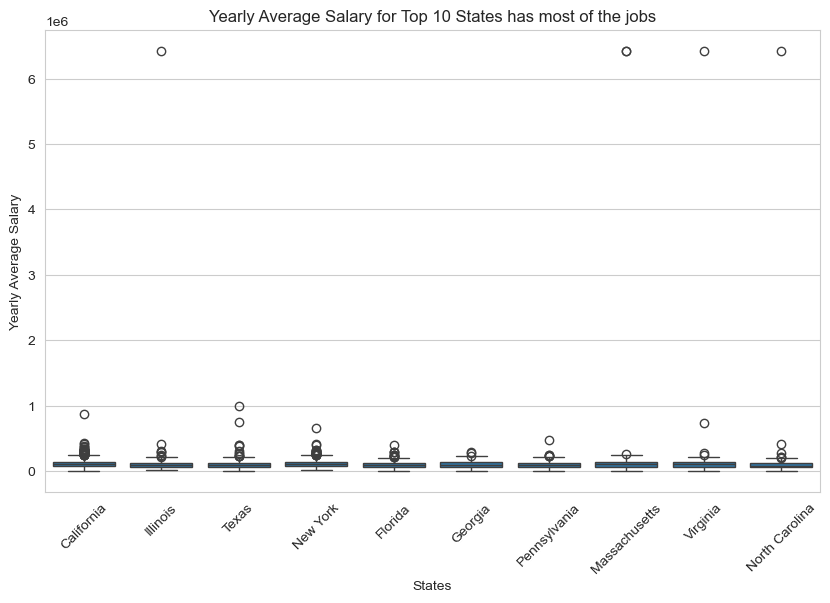

In [280]:
# Create the box plot for the filtered data
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='yearly_avg_salary', data=top_10_data)

plt.xticks(rotation=45)
plt.title('Yearly Average Salary for Top 10 States has most of the jobs')
plt.ylabel('Yearly Average Salary')
plt.xlabel('States')

plt.show()

We now can see some of the ouliner are much highlighted in 3 states: California, Texas and New York.

Redo the process to remove those outliner again, but this time, we will apply outliner checking to each of the states in Top 10 states list.

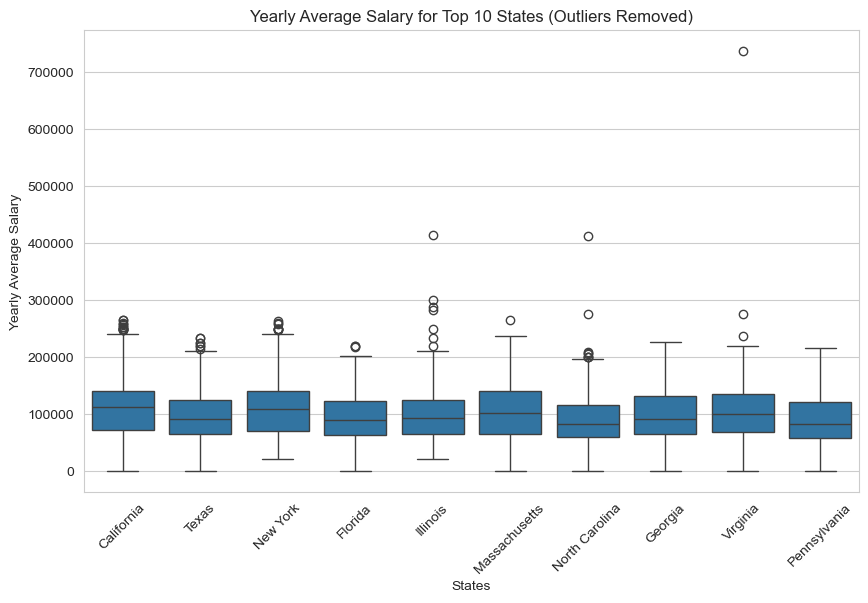

In [281]:
# Initialize an empty DataFrame to store the filtered data
filtered_data = pd.DataFrame()

# Calculate Z-scores and filter outliers for each of the top 10 states
for state in top_10_states:
    state_data = top_10_data[top_10_data['state'] == state].copy()
    state_data['z_score'] = stats.zscore(state_data['yearly_avg_salary'])
    state_data_filtered = state_data[(state_data['z_score'] >= -3) & (state_data['z_score'] <= 3)]
    filtered_data = pd.concat([filtered_data, state_data_filtered])

# Plot the box plot for the filtered data again
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='yearly_avg_salary', data=filtered_data)

plt.xticks(rotation=45)
plt.title('Yearly Average Salary for Top 10 States (Outliers Removed)')
plt.ylabel('Yearly Average Salary')
plt.xlabel('States')

plt.show()


Conclusion:
- California, New York and Texas are the top 3 has the highest number of job posting there, proving the demands on labour in those big cities.
- Florida has the lowest median while big city like New York or California has leading the median salary values.

## 4. Competitive company breakdown based on salary, experience and number of applicant<a id='competitive'></a>

### Cleaning data

Since the main data jobs_posting does not include company name but only company ID so add column name by mapping to display it easier for audience.

In [282]:
# Create a series with company_id as index and company_name as values
company_name_mapping = df_comp.set_index('company_id')['name']

# Map company_id in jobs_posting_lcn to company names using the series
jobs_posting_sal_state['company_name'] = jobs_posting_sal_state['company_id'].map(company_name_mapping)


Clone to the new dataframe new_df to get the needed column to analyze and drop those rows that are missing values

In [283]:
# Selecting specific columns to create a new DataFrame and drop na
new_df = jobs_posting_sal_state[['applies', 'yearly_avg_salary', 'company_name', 'formatted_experience_level']].copy().dropna()

Remove outliners of Average salary if it's outside of 2 standard deviation

In [284]:
from scipy import stats
new_df['salary_z_score'] = stats.zscore(new_df['yearly_avg_salary'])

new_df = new_df[(new_df['salary_z_score'] >= -2) & (new_df['salary_z_score'] <= 2)]

### Plot and analysis

We will use scatter plot to see the relationship between salary and number of applicants as to test our hypothesis whether higher salary will attract more candidate or not.

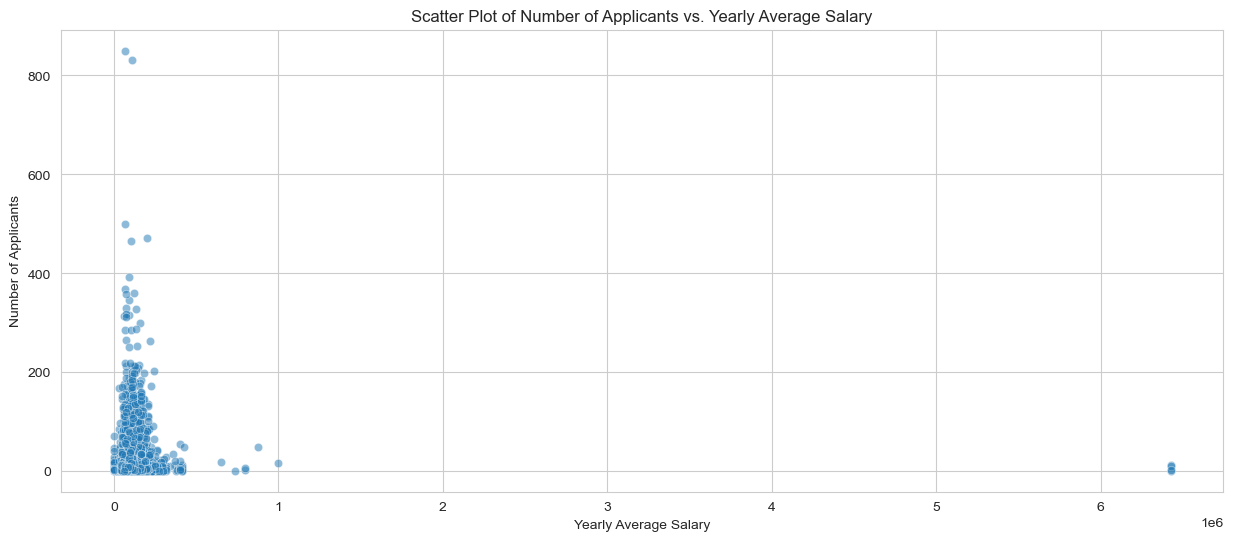

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=new_df, x='yearly_avg_salary', y='applies', alpha=0.5)

plt.title('Scatter Plot of Number of Applicants vs. Yearly Average Salary')
plt.xlabel('Yearly Average Salary')
plt.ylabel('Number of Applicants')
plt.show()

After the first filter, the result still have some outliner so we will calculate z score on the current data set to remove these above outliner for better view

In [286]:
new_df['salary_z_score'] = stats.zscore(new_df['yearly_avg_salary'])

new_df = new_df[(new_df['salary_z_score'] >= -2) & (new_df['salary_z_score'] <= 2)]


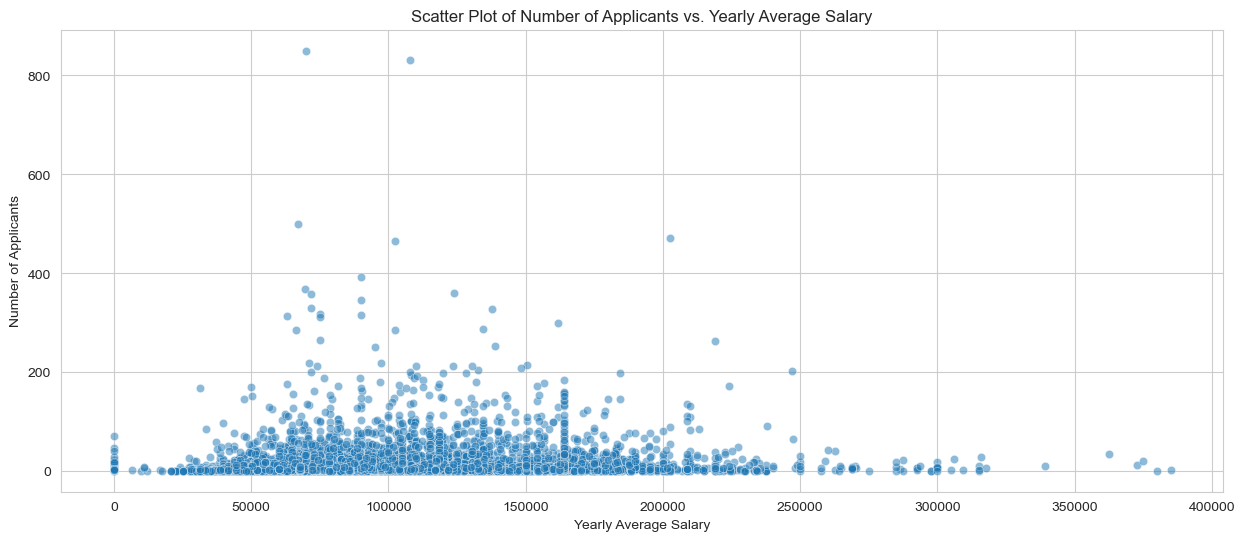

In [287]:
# Create the scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(data=new_df, x='yearly_avg_salary', y='applies', alpha=0.5)

plt.title('Scatter Plot of Number of Applicants vs. Yearly Average Salary')
plt.xlabel('Yearly Average Salary')
plt.ylabel('Number of Applicants')
plt.show()

It seems number of applicants are varies across all salary range, but when salary rangin from 50K to 200K annually, majority will have at max 200 candidates submitted their application. So let scale down to see clearer. Let continue to see beside salaries, what else make the company more competitive.

In [288]:
import plotly.express as px
#Scale down to take only those job with number of applicants < 200 as most of the job will have max roughly 200 applications
new_df_less_applicant = new_df[(new_df['applies'] <200)]

# Create the interactive scatter plot
fig = px.scatter(new_df_less_applicant, x='yearly_avg_salary', y='applies',
                 color='formatted_experience_level', # Assigns colors based on experience level
                 hover_data=['company_name'], # Shows company name when you hover over a point
                 title='Interactive Plot of Number of Applicants vs. Yearly Average Salary for Jobs with < 200 Applicants',
                 labels={'yearly_avg_salary': 'Yearly Average Salary', 'applies': 'Number of Applicants'},
                color_discrete_sequence=px.colors.qualitative.Bold)

# Show the plot
fig.show()


Conclusion:
- Mid-Senior and Associate level are dominating the market where number of applicants are taken majority
- Salary offered for Entry level applicants across the range but mostly applicants will submit to those with salary around 50K - 100K. This is understandable as higher salary will require more niche skills and experience which are something new-entry applicants still lacking of.

## 5. Salary and number of job by states in the US<a id='salary_no'></a>

In [289]:
# Check for NA value in states column
jobs_posting['state'].isnull().sum().sum()

4087

In [290]:
# Check for NA value in job_id column
jobs_posting['job_id'].isnull().sum().sum()

0

__Comments__: Since it's just a simple count value so we don't need to check for outlier, only for NA value

In [291]:
# Top 10 states that post the highest amount of jobs on Linkedln
X_sorted = jobs_posting.groupby('state')['job_id'].count().sort_values(ascending=False).head(10)
X_sorted

state
California        3299
Texas             2057
New York          1395
Florida           1322
Illinois           978
Massachusetts      787
Virginia           785
North Carolina     780
Pennsylvania       760
Georgia            755
Name: job_id, dtype: int64

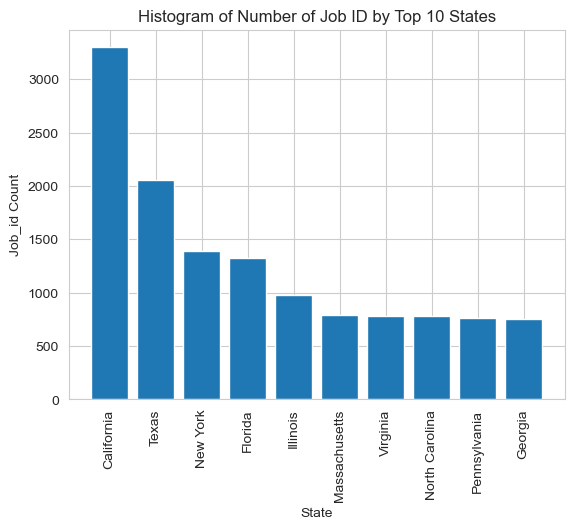

In [292]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.bar(X_sorted.index, X_sorted.values)
plt.xlabel('State')
plt.ylabel('Job_id Count')
plt.title('Histogram of Number of Job ID by Top 10 States')
plt.xticks(rotation=90)
plt.show()

In [293]:
# Conclusion
print(f'Highest job posting state is {X_sorted.index[0]}', f'with {X_sorted.values[0]} in total')

Highest job posting state is California with 3299 in total


In [294]:
jobs_posting['yearly_avg_salary'].isna().sum()

jobs_posting = jobs_posting[jobs_posting['yearly_avg_salary'].notna()]

In [295]:
# Check for top 10 states that have the highest AVG yearly salary
X1_sorted = jobs_posting.groupby('state')['yearly_avg_salary'].mean().sort_values(ascending=False).head(10)
X1_sorted

state
Colorado                445946.852002
California              230522.799498
Illinois                222788.108420
Massachusetts           145684.822934
Nevada                  139619.966704
District Of Columbia    138294.683853
North Carolina          136133.112497
England                 134641.261554
Kentucky                131455.496997
Oregon                  129280.453449
Name: yearly_avg_salary, dtype: float64

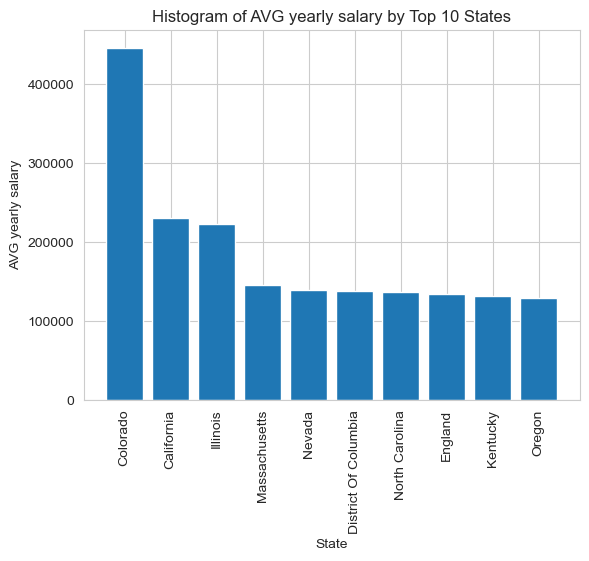

In [296]:
# PLot the bar graph
plt.bar(X1_sorted.index,X1_sorted.values)
plt.xlabel('State')
plt.ylabel('AVG yearly salary')
plt.title('Histogram of AVG yearly salary by Top 10 States')
plt.xticks(rotation=90)
plt.show()

__Conclusion__: California has the highest job posting but far below the avg salary in Colorado. High chance of outlier here

In [297]:
# Check AVG yearly salary according to top 10 states
X1_sorted = jobs_posting.groupby('state')['yearly_avg_salary'].mean().sort_values(ascending=False).head(10).index
X1_sorted

Index(['Colorado', 'California', 'Illinois', 'Massachusetts', 'Nevada',
       'District Of Columbia', 'North Carolina', 'England', 'Kentucky',
       'Oregon'],
      dtype='object', name='state')

In [298]:
from scipy import stats
# Filter the top 10 states 
top_10_states = jobs_posting['state'].value_counts().head(10).index
top_10_data = jobs_posting[jobs_posting['state'].isin(top_10_states)]

filtered_data = pd.DataFrame()

# Calculate Z-scores and filter outliers for each of the top 10 states
for state in top_10_states:
    state_data = top_10_data[top_10_data['state'] == state].copy()
    state_data['z_score'] = stats.zscore(state_data['yearly_avg_salary'])
    state_data_filtered = state_data[(state_data['z_score'] >= -3) & (state_data['z_score'] <= 3)]
    filtered_data = pd.concat([filtered_data, state_data_filtered])

In [299]:
filtered_data.head(5)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,...,new_closed_time,new_listed_time,avg_salary,yearly_avg_salary,industry_id,industry_name,Location,city,state,z_score
1,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,NaT,2023-11-14 22:13:20,22.27,46499.760000,100.0,Non-profit Organizations,"Aliso Viejo, CA",Aliso Viejo,California,-0.030631
6,3757936097,18213359.0,Dishwasher,NaN,19.30,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,...,NaT,2023-11-14 22:13:20,19.30,40298.400000,100.0,Non-profit Organizations,"Aliso Viejo, CA",Aliso Viejo,California,-0.031664
17,3757934423,18213359.0,Custodian/Janitor,NaN,19.30,NaN,HOURLY,Full-time,"Altadena, CA",NaN,...,NaT,2023-11-14 22:13:20,19.30,40298.400000,100.0,Non-profit Organizations,"Altadena, CA",Altadena,California,-0.031664
22,3757934318,6577380.0,CDL Class B Driver,27.0,NaN,25.0,HOURLY,Full-time,"Oakland, CA",NaN,...,NaT,2023-11-14 22:13:20,26.00,54288.000000,92.0,Truck Transportation,"Oakland, CA",Oakland,California,-0.029335
32,3757933458,99500291.0,Associate Veterinarian,NaN,NaN,NaN,NaN,Full-time,"Santa Rosa, CA",NaN,...,NaT,2023-11-14 22:13:20,NaN,71694.226667,16.0,Veterinary Services,"Santa Rosa, CA",Santa Rosa,California,-0.026438


In [300]:
# Get the mean value of the top 10 states' AVG yearly salary
X2_sorted = filtered_data.groupby('state')['yearly_avg_salary'].mean().sort_values(ascending=False).head(10)
X2_sorted

state
California        126129.386156
Illinois          114021.258992
New York          109395.703447
Massachusetts     104839.106693
Virginia          104060.153441
Georgia            98313.817170
Texas              98124.119253
Florida            94829.815476
Pennsylvania       94024.404040
North Carolina     89943.748937
Name: yearly_avg_salary, dtype: float64

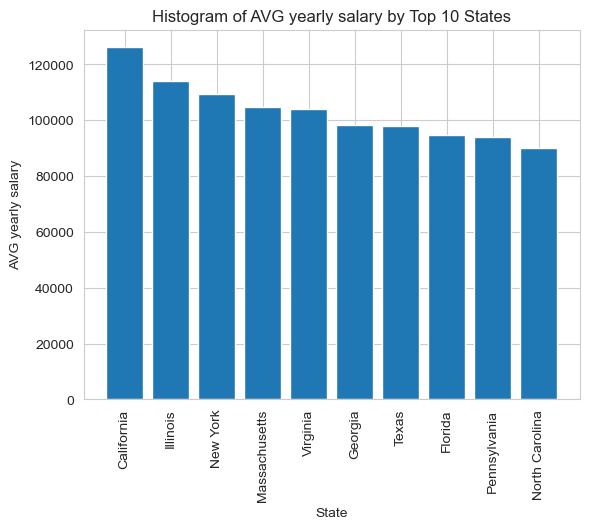

In [301]:
# Plot the bar graph
plt.bar(X2_sorted.index,X2_sorted.values)
plt.xlabel('State')
plt.ylabel('AVG yearly salary')
plt.title('Histogram of AVG yearly salary by Top 10 States')
plt.xticks(rotation=90)
plt.show()

In [302]:
# Conclusion
print(f'The state with highest avg yearly salary is {X2_sorted.index[0]}', f'with USD$ {X2_sorted.values[0]:2f}')

The state with highest avg yearly salary is California with USD$ 126129.386156


## 6. Compare remote vs in person in term of salary, demand<a id='remote'></a>

In [303]:
# Check for NA value
jobs_posting['remote_allowed'].isnull().sum().sum()

23273

In [304]:
jobs_posting['remote_allowed'].head(5)

0    NaN
1    NaN
2    1.0
3    1.0
4    NaN
Name: remote_allowed, dtype: float64

In [305]:
# Replace NA value by 'Other' because we're unsure the status is Not allowed or Sometimes
jobs_posting['remote_allowed'] = jobs_posting['remote_allowed'].fillna('Other')
jobs_posting['remote_allowed'] = jobs_posting['remote_allowed'].replace(1.0, 'Yes')
jobs_posting["remote_allowed"].head(5)

0    Other
1    Other
2      Yes
3      Yes
4    Other
Name: remote_allowed, dtype: object

In [306]:
# Check again
jobs_posting["remote_allowed"].value_counts()

remote_allowed
Other    23273
Yes       3578
Name: count, dtype: int64

In [307]:
# Percentage of job allowed remote working
remote_percentage = (jobs_posting[jobs_posting["remote_allowed"]=="Yes"]["remote_allowed"].count() / len(jobs_posting)) * 100
remote_percentage

13.325388253696325

In [308]:
# Percentage of job NOT allowed remote working
not_remote_percentage = 100 - remote_percentage
not_remote_percentage

86.67461174630367

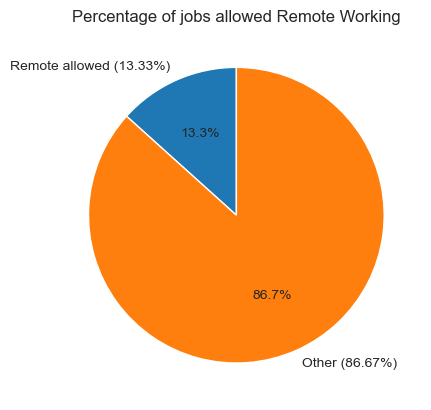

In [309]:
# Create labels for pie chart
labels = [f'Remote allowed ({remote_percentage:.2f}%)', f'Other ({not_remote_percentage:.2f}%)']

# Create values for pie chart
sizes = [remote_percentage, not_remote_percentage]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Percentage of jobs allowed Remote Working')
plt.show()

In [310]:
print(f'Total percentage of Remote Allowed job is {remote_percentage:.2f}%', f'Total percentage of Other is {not_remote_percentage:.2f}%')

Total percentage of Remote Allowed job is 13.33% Total percentage of Other is 86.67%


In [311]:
# Average yearly salary from jobs that allowed remote working vs Other
X2 = jobs_posting.groupby('remote_allowed')['yearly_avg_salary'].mean()
X2

remote_allowed
Other    141071.542067
Yes      139655.991488
Name: yearly_avg_salary, dtype: float64

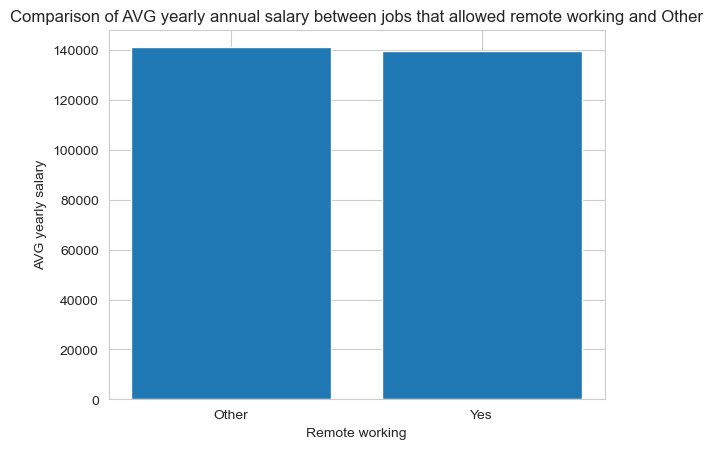

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(X2.index, X2.values)
plt.xlabel('Remote working')
plt.ylabel('AVG yearly salary')
plt.title('Comparison of AVG yearly annual salary between jobs that allowed remote working and Other')
plt.xticks(rotation=0)
plt.show()

## 7. Top 5 skills with highest demand and salary<a id='skill'></a>

Read skills data:

In [313]:
df_job_skills = pd.read_csv('./data/job_details/job_skills.csv')
df_job_skills.head(5)


,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT


In [314]:
df_skills = pd.read_csv('./data/maps/skills.csv')
df_skills.head(5)

,skill_abr,skill_name
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning


Map data jobs to data skills:

In [315]:
df_job_skills_1 = pd.merge(jobs_posting, df_job_skills, how = 'left', on = 'job_id')
df_job_skills_2 = pd.merge(df_job_skills_1, df_skills, how = 'left', on = 'skill_abr')

Filters columns used for this analysis:

In [316]:
df_job_skills_2 = df_job_skills_2[['job_id','skill_name','yearly_avg_salary']]
df_job_skills_2[['job_id','skill_name','yearly_avg_salary']].head(5)

,job_id,skill_name,yearly_avg_salary
0,3757940104,Other,63000.000000
1,3757938018,Management,46499.760000
2,3757938018,Manufacturing,46499.760000
3,3757937095,Information Technology,240895.000000
4,3757937037,Sales,120439.673333


Check NA skills:

In [317]:
df_job_skills_2['skill_name'].isna().sum()

296

Check NA salary:

In [318]:
df_job_skills_2['yearly_avg_salary'].isna().sum()

0

Calculate job count by skills:

In [319]:
job_count_by_skills = df_job_skills_2.groupby('skill_name').size().reset_index(name ='count_job').sort_values(by = 'count_job', ascending= False).head(5)
job_count_by_skills

,skill_name,count_job
16,Information Technology,5771
29,Sales,4332
18,Management,4258
19,Manufacturing,3848
14,Health Care Provider,3380


Check for outliers in salary:

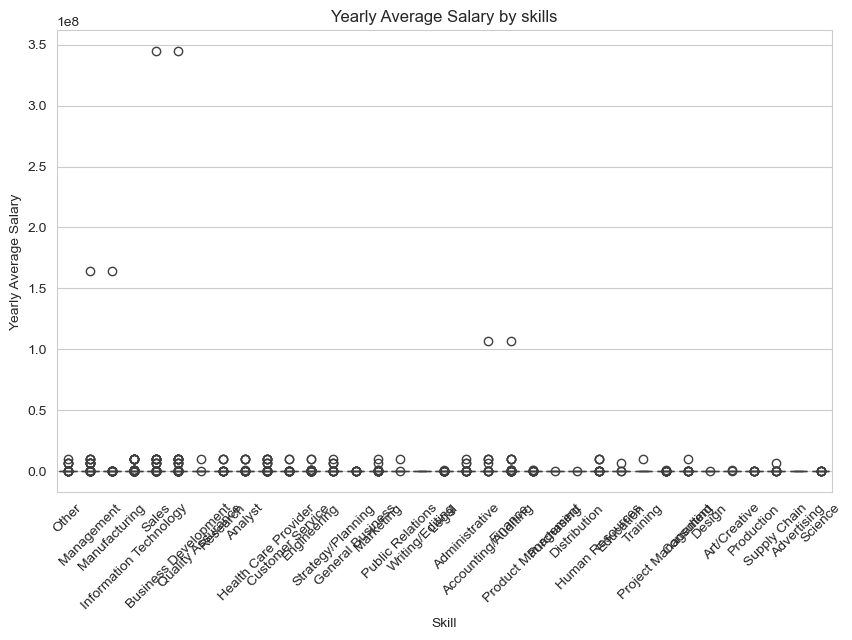

In [320]:
# Create the box plot for the filtered data
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='skill_name', y='yearly_avg_salary', data=df_job_skills_2)

plt.xticks(rotation=45)
plt.title('Yearly Average Salary by skills')
plt.ylabel('Yearly Average Salary')
plt.xlabel('Skill')

plt.show()

There are some outliers, therefore we need to filter by zscore

In [321]:
from scipy import stats

# Group by 'Skills'
grouped_skills = df_job_skills_2.groupby(['skill_name'])

# Calculate mean and std dev of 'yearly_avg_salary' within each group
skills_mean_std = grouped_skills['yearly_avg_salary'].agg(['mean', 'std']).reset_index()

# Merge the mean and std dev back to the original dataframe to use in Z-score calculation
df_skills_merged = pd.merge(df_job_skills_2,skills_mean_std, on=['skill_name'], how = 'left')

# Calculate Z-score
df_skills_merged['zscore'] = (df_skills_merged['yearly_avg_salary'] - df_skills_merged['mean']) / df_skills_merged['std']

# Show the resulting dataframe with Z-scores
df_skills_merged[['skill_name', 'yearly_avg_salary', 'zscore']]


,skill_name,yearly_avg_salary,zscore
0,Other,63000.000000,-0.126402
1,Management,46499.760000,-0.038469
2,Manufacturing,46499.760000,-0.029483
3,Information Technology,240895.000000,0.270850
4,Sales,120439.673333,-0.017460
...,...,...,...
46283,Sales,140882.914456,-0.013570
46284,Business Development,140882.914456,-0.019050
46285,Design,140882.914456,1.025745
46286,Art/Creative,140882.914456,0.801596


In [322]:
df_skills_merged = df_skills_merged[(df_skills_merged['zscore']>= -3)&(df_skills_merged['zscore']<=3)]
df_skills_merged

,job_id,skill_name,yearly_avg_salary,mean,std,zscore
0,3757940104,Other,63000.000000,103510.313890,3.204877e+05,-0.126402
1,3757938018,Management,46499.760000,144355.287243,2.543719e+06,-0.038469
2,3757938018,Manufacturing,46499.760000,124422.040381,2.642952e+06,-0.029483
3,3757937095,Information Technology,240895.000000,130277.620457,4.084081e+05,0.270850
4,3757937037,Sales,120439.673333,212198.226251,5.255276e+06,-0.017460
...,...,...,...,...,...,...
46283,85008768,Sales,140882.914456,212198.226251,5.255276e+06,-0.013570
46284,85008768,Business Development,140882.914456,262832.322171,6.401499e+06,-0.019050
46285,3958427,Design,140882.914456,100803.621493,3.907334e+04,1.025745
46286,3958427,Art/Creative,140882.914456,97984.879578,5.351579e+04,0.801596


409 ouliers have been removed

### Bar plot for job count by skills:

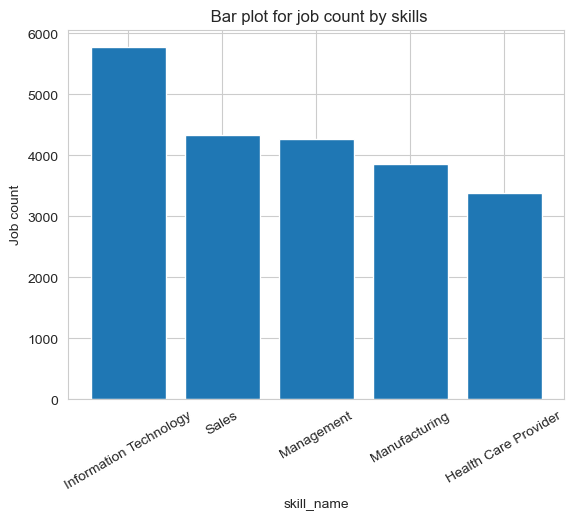

In [323]:
plt.bar(job_count_by_skills['skill_name'], job_count_by_skills['count_job'])
plt.xlabel('skill_name')
plt.ylabel('Job count')
plt.title(' Bar plot for job count by skills')
plt.xticks(rotation=30)
plt.show()

Calculate mean salary by skills:

In [324]:

final_mean_salary_by_skill = df_skills_merged.groupby(['skill_name'])['yearly_avg_salary'].mean().reset_index(name ='mean_salary').sort_values(by = 'mean_salary', ascending= False).head(5)
final_mean_salary_by_skill['mean_salary'] = final_mean_salary_by_skill['mean_salary'].apply('round')
final_mean_salary_by_skill

,skill_name,mean_salary
2,Advertising,162392.0
5,Business Development,144774.0
29,Sales,132700.0
22,Product Management,131087.0
17,Legal,127595.0


### Bar plot for average salary by skills:

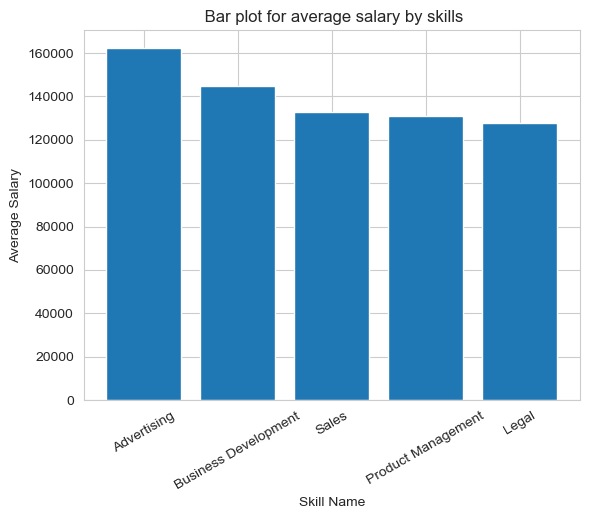

In [325]:
plt.bar(final_mean_salary_by_skill['skill_name'], final_mean_salary_by_skill['mean_salary'])
plt.xlabel('Skill Name')
plt.ylabel('Average Salary')
plt.title(' Bar plot for average salary by skills')
plt.xticks(rotation=30)
plt.show()

We can see that IT has the highest demand in job market, while Advertising is the skill with highest salary

## CONCLUSION<a id='conclusion'></a>

### 3. Higher salary in big states
Those most popular states with lot of companies hence offer many more job opportunities and also their salary are averagely higher than those state that are smaller due to living cost different.

### 4. Job market offer competitive salary for all experience talent, even for Entry level with demanding skills
Experience workers are actively seeking for new opportunities in all over of the US especially after the mass layoff in many industry during Covid 19. For New-Entry candidate, the market is really competitive especially for those job with yearly salary ranging from 50K to 100K. On the other hand, if candidate has a niche skills that the market is in need for, they can apply for extremely well paid job where there are less competitor in the pools.
### 5. Salary and number of job by states in the US

California is the number one state that had the highest number of job posting via Linkedln, followed by Texas, Florida and New York. The rest of the top 10 states including Illinois, North Carolina or Massachusetts were relative with each other but 4 times lower than California. 

Outliers play a critical role in cleaning data since it influents significantly to the sknewness of our analysis. We applied z-score method to filter the yearly average salary according to states and the highest average salary was also from the state that posted the most jobs on Linkedln: California, with USD 103466, followed by New York with USD 101270. There were some states that didn't enter the top 10 job postings but had considerably high average yearly salary, such as Washington, New Jersey, Colorado, etc.

### 6. Compare remote vs in person in term of salary, demand

It was confusing since the remote_allowed column only had 2 variables: 1.0 and null so we weren't able to determine jobs that has null value are hybrid or 100% in-person. In the end, we decided to change null value into "Other". Comparatively, only a fraction of job posting on Linkedln was noted as remote allowed with only 14%. However, this status did not mean the average salary of these jobs are lower than "Other".
### 7. Top 5 skills with highest demand and salary

The skill with the highest average salary is 'Advertising', followed closely by 'Business Development', 'Sales', 'Product Management', and 'Legal'. The differences in average salary between these skills seem relatively small, suggesting a fairly balanced market in terms of salary across these skill sets.  

There's a notable variance in job availability, with 'Information Technology' leading significantly in job count. This could be reflective of the current market trends where tech skills are in high demand.